<a href="https://colab.research.google.com/github/NicholasJDev/DiseasePredictionModel/blob/main/DiseasePredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personal Project Disease Prediction




## Introduction

In this project we will make a model that is going to predict the possibility of Disease for certain people that listen in the data set.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

hl_data = pd.read_csv('https://raw.githubusercontent.com/NicholasJDev/DiseasePredictionModel/main/data.csv')

In [27]:
# Display the first 5 rows of the dataframe
hl_data.head()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [28]:
# Display information about the dataframe, including the data type of each column and the number of non-null values
hl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age_days     70000 non-null  int64  
 2   age_year     70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


In [29]:
hl_data.describe()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
hl_data.isnull().sum()

id             0
age_days       0
age_year       0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [31]:
hl_data.drop("id", axis=1, inplace = True)
hl_data.drop("age_days", axis=1, inplace = True)

hl_data.columns

Index(['age_year', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

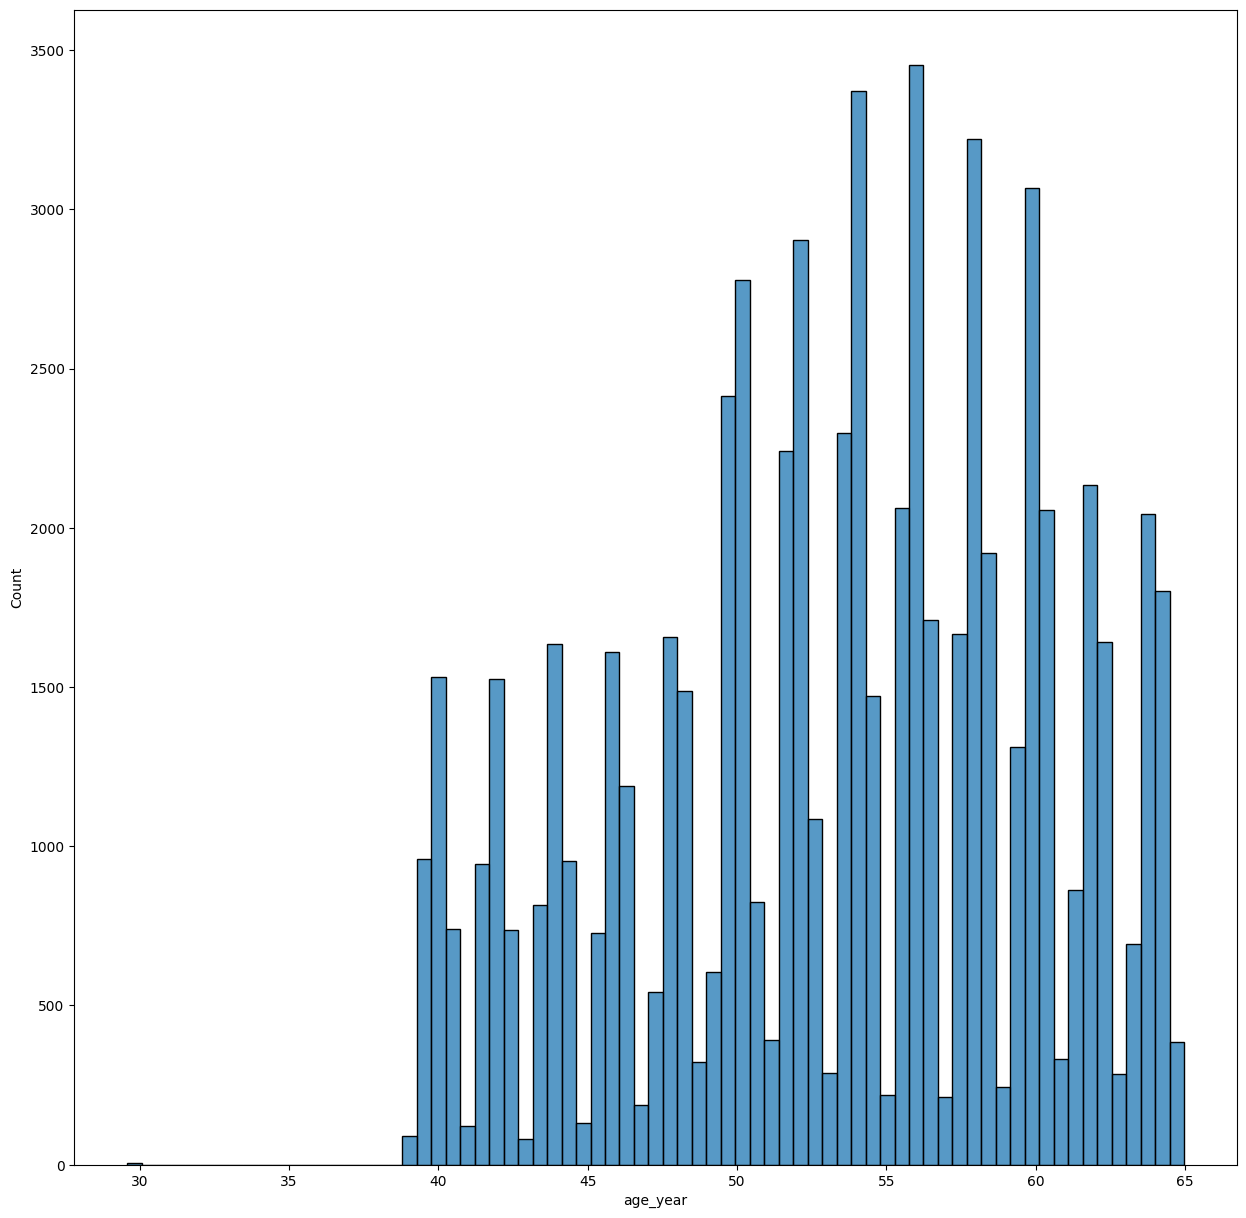

In [32]:
figure, axs = plt.subplots(figsize=(15, 15))

sns.histplot(hl_data["age_year"])

plt.tight_layout
plt.show()

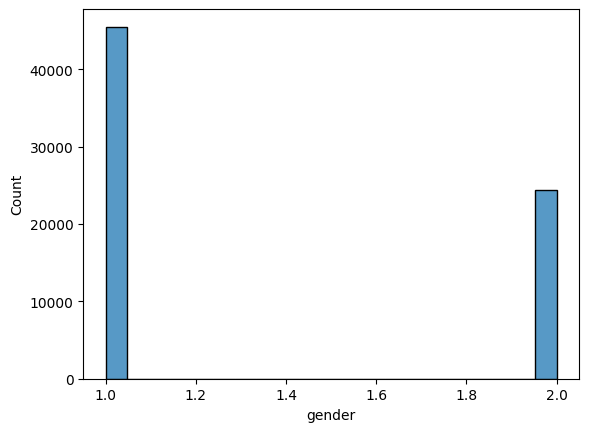

In [33]:

sns.histplot(hl_data["gender"])

plt.tight_layout
plt.show()

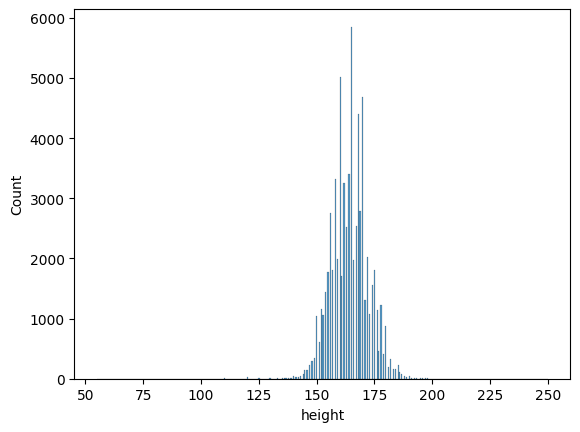

In [34]:

sns.histplot(hl_data["height"])

plt.tight_layout
plt.show()

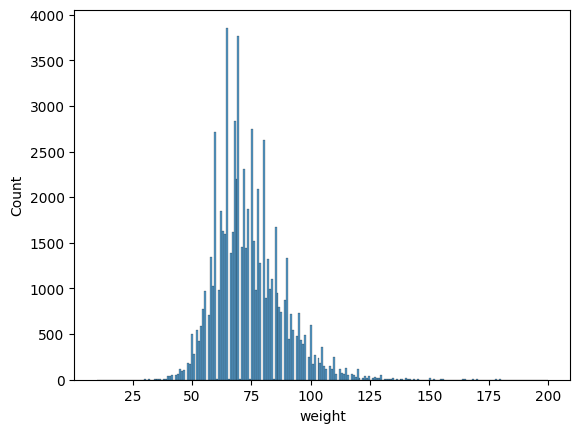

In [35]:

sns.histplot(hl_data["weight"])

plt.tight_layout
plt.show()

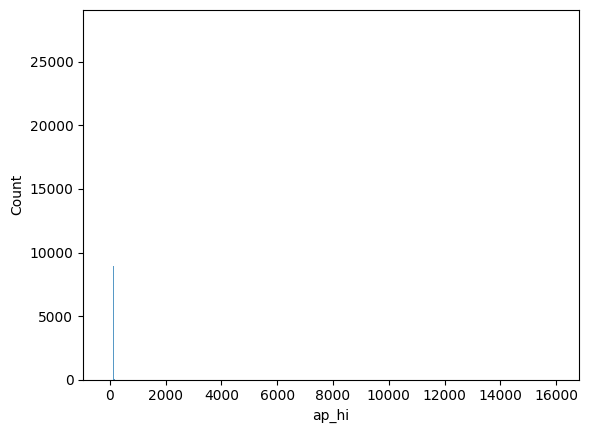

In [36]:
sns.histplot(hl_data["ap_hi"])

plt.tight_layout
plt.show()

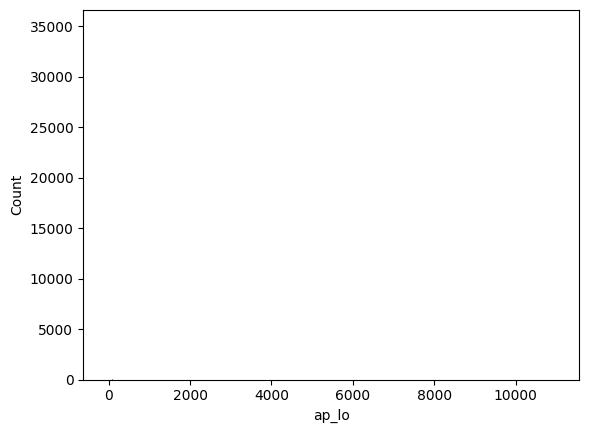

In [37]:
sns.histplot(hl_data["ap_lo"])

plt.tight_layout
plt.show()

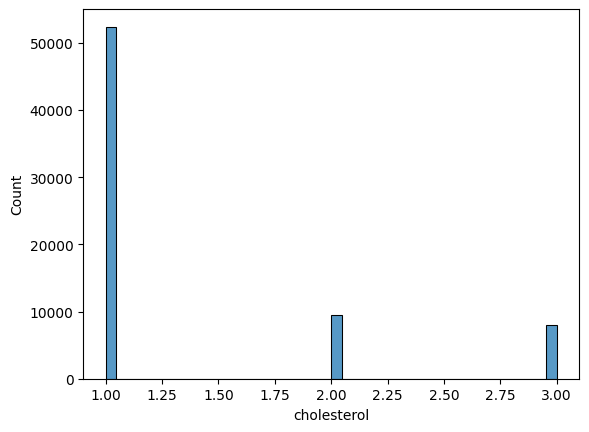

In [38]:
sns.histplot(hl_data["cholesterol"])

plt.tight_layout
plt.show()

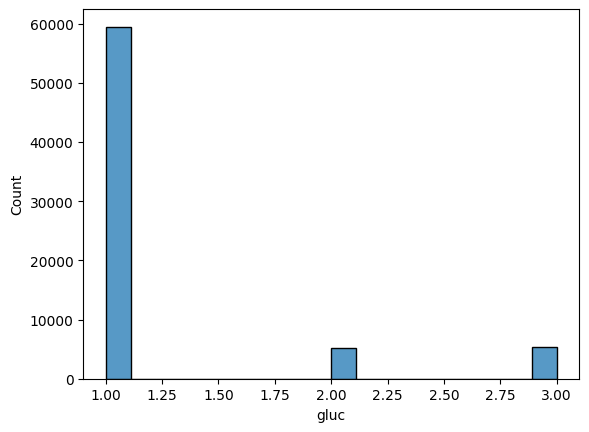

In [39]:
sns.histplot(hl_data["gluc"])

plt.tight_layout
plt.show()

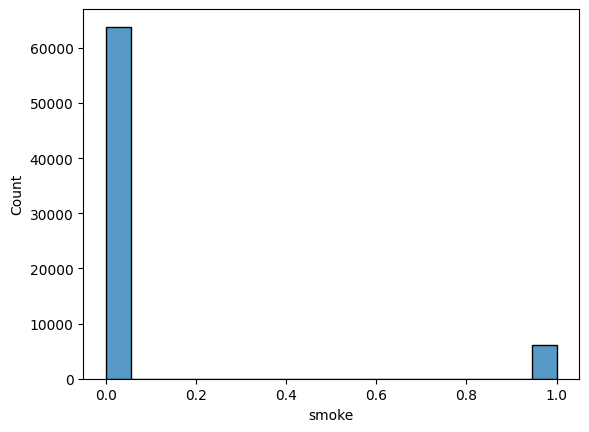

In [40]:
sns.histplot(hl_data["smoke"])

plt.tight_layout
plt.show()

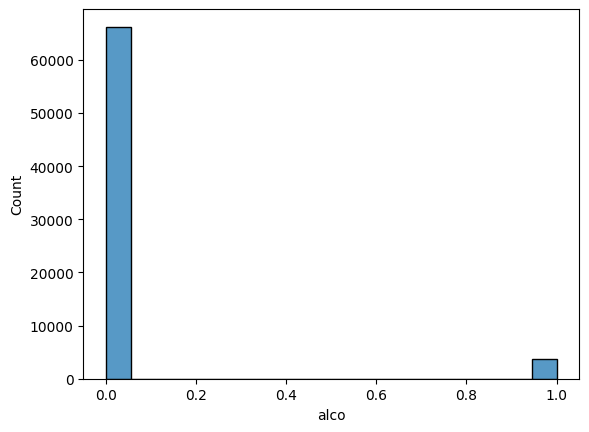

In [41]:
sns.histplot(hl_data["alco"])

plt.tight_layout
plt.show()

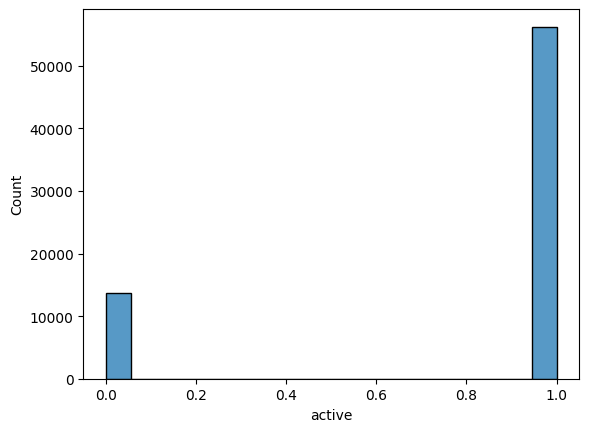

In [42]:
sns.histplot(hl_data["active"])

plt.tight_layout
plt.show()

In [43]:
scale_colmns=['height', 'weight', 'ap_hi', 'ap_lo','cholesterol', 'gluc', 'smoke', 'alco', 'active']
scaler = StandardScaler()
hl_data[scale_colmns] = scaler.fit_transform(hl_data[scale_colmns])

hl_data.head()

,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.39572,-0.310879,-0.238384,0.494167,0
1,55.419178,1,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.39572,-0.310879,-0.238384,0.494167,1
2,51.663014,1,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.39572,-0.310879,-0.238384,-2.023607,1
3,48.282192,2,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.39572,-0.310879,-0.238384,0.494167,1
4,47.873973,1,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.39572,-0.310879,-0.238384,-2.023607,0


In [44]:
X = hl_data.drop("cardio", axis=1)
y = hl_data["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
def run_model(rmodel, X_train, y_train, X_test, y_test):
  rmodel.fit(X_train, y_train)
  y_predict = rmodel.predict(X_test)

  accuracy = accuracy_score(y_test, y_predict)
  precision = precision_score(y_test, y_predict)
  recall = recall_score(y_test, y_predict)
  f1 = f1_score(y_test, y_predict)

  return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = run_model(RandomForestClassifier(n_estimators = 100, random_state=42), X_train, y_train, X_test, y_test)

accuracy, precision, recall, f1

(0.7142142857142857,
 0.7192369302461046,
 0.7043639475185397,
 0.7117227465955761)